## Intravenous therapy

Intravenous therapy (abbreviated as IV therapy) is a medical technique that administers fluids, medications and nutrients directly into a person's vein. The intravenous route of administration is commonly used for rehydration or to provide nutrients for those who cannot, or will not—due to reduced mental states or otherwise—consume food or water by mouth.

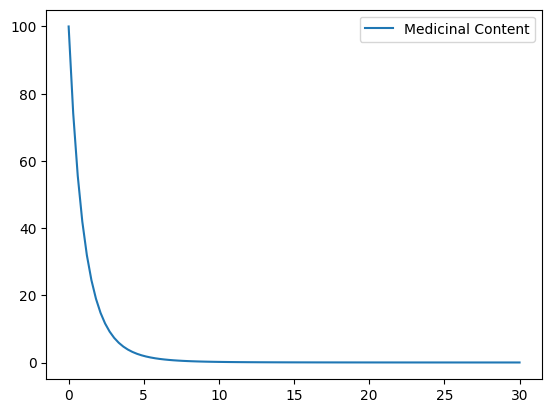

In [106]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp, mid_point_ivp, fwd_euler_ivp, rk38_ivp

def i_v_injection(variables, t, params):
    M = variables[0]

    k_ao = params

    dMdt = - M * torch.e ** (-k_ao * t)

    return torch.tensor([dMdt])

t = torch.linspace(0, 30, 100)

params = torch.tensor([0.1])

y0 = torch.tensor([100])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
plt.legend(["Medicinal Content",])
plt.show()

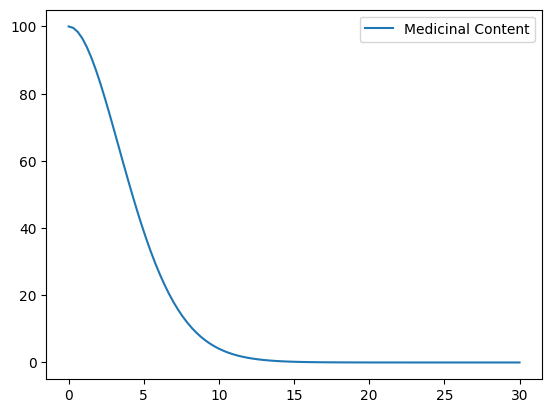

In [103]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    M = variables[0]

    k_oa, k_ao = params

    dMdt = M * torch.e ** (-k_oa*t) - M * torch.e ** (-k_ao*t)

    return torch.tensor([dMdt])

t = torch.linspace(0, 30, 100)

params = torch.tensor([0.1, 0.01])

y0 = torch.tensor([100])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
plt.legend(["Medicinal Content"])
plt.show()

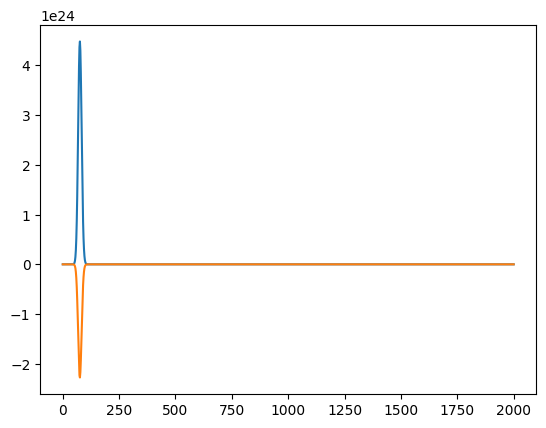

In [107]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    A, B = variables

    k_ao, k_ab, k_ba = params

    dAdt = - A * torch.e ** (-k_ao*t) - A * torch.e ** (-k_ab*t) + B * torch.e ** (-k_ab*t)
    dBdt = - B * torch.e ** (-k_ba*t) + A * torch.e ** (-k_ab*t)

    return torch.tensor([dAdt, dBdt])

t = torch.linspace(0, 2000, 1000)

a = 0.005
b = 0.01
c = 0.01

params = torch.tensor([a, b, c])

y0 = torch.tensor([100, 20])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
#plt.legend(["Medicinal Content",])
plt.show()

In [66]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def i_v_injection(variables, t, params):
    A, B, C, I = variables

    N = A + B + C + I

    k_oa, k_ao, k_ab, k_ba, k_ac, k_ca, k_bc, k_cb = params

    dAdt = k_oa*I + k_ba*B + k_ca*C - k_ao*A - k_ab*A - k_ac*A
    dBdt = k_ab*A + k_cb*C - k_ba*B - k_bc*B
    dCdt = k_ac*A + k_bc*B - k_ca*C - k_cb*C

    return torch.tensor([dAdt, dBdt, dCdt])

t = torch.linspace(0, 1600, 1000)

params = torch.tensor([0.01, 0.05, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01])

y0 = torch.tensor([100, 20, 300])

y = rk4_ivp(i_v_injection, y0, t, params)

plt.plot(t, y)
#plt.legend(["Medicinal Content",])
plt.show()

ValueError: not enough values to unpack (expected 4, got 3)